In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_excel('data_full_sekres.xlsx')

,Unnamed: 0,datetime,battery_0__actualPower,thrusterAndPropulsion,sumEngMdoPower,hotelLoad,shorePowerEstimated,numberOfMdoEnginesRunning,operationId,dpMode,...,engMdoPerformance_1_,engMdoPerformance_2_,engMdoPerformance_3_,engMdoConsumption_0_,engMdoConsumption_1_,engMdoConsumption_2_,engMdoConsumption_3_,speedOverGround,INDEX,secs
71991,71991,2020-01-30 19:59:50.999,4,1298.00,2087,793.00,0,2,100,0,...,0.000,0,222.917,245.80,0.00,0.0,257.45,0.891,71991,0
71992,71992,2020-01-30 19:59:51.999,-19,1210.00,1813,584.00,0,2,100,0,...,0.000,0,232.152,244.85,0.00,0.0,247.45,1.470,71992,1
71993,71993,2020-01-30 19:59:52.999,-19,858.00,1519,642.00,0,2,100,0,...,0.000,0,213.856,206.85,0.00,0.0,201.00,2.278,71993,2
71994,71994,2020-01-30 19:59:53.999,-25,418.00,893,450.00,0,2,100,0,...,0.000,0,272.744,113.25,0.00,0.0,131.80,2.390,71994,3
71995,71995,2020-01-30 19:59:54.999,-69,110.00,393,214.00,0,2,100,0,...,0.000,0,442.532,97.35,0.00,0.0,99.25,2.740,71995,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600637,600637,2020-02-05 22:50:37.007,-47,811.16,1149,290.84,0,2,100,2,...,254.834,0,265.777,0.00,172.05,0.0,173.60,1.029,600637,143448
600638,600638,2020-02-05 22:50:38.007,-47,811.16,1267,408.84,0,2,100,2,...,223.915,0,223.674,0.00,163.60,0.0,164.20,1.466,600638,143449
600639,600639,2020-02-05 22:50:39.007,-30,722.86,1058,305.14,0,2,100,2,...,249.069,0,259.667,0.00,155.20,0.0,155.80,1.261,600639,143450
600640,600640,2020-02-05 22:50:40.007,18,683.05,1084,418.95,0,2,100,2,...,256.109,0,241.074,0.00,154.85,0.0,156.35,1.180,600640,143451


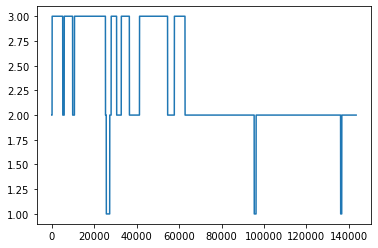

In [103]:
df = df.loc[df['operationId'] == 100]

df['INDEX'] = df.index
df['secs'] = np.arange(0, len(df),1)
x = df['secs']
ynum = df['numberOfMdoEnginesRunning']
ydp = df['dpMode']

plt.plot(x,ynum)
#plt.plot(x,ydp)

display(df)

Max load is:  3741.74


Text(0.5, 1.0, 'Normalized power and no of engines running')

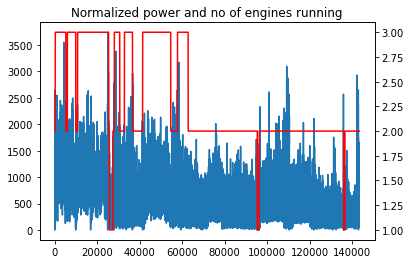

In [197]:
x = df['secs']
ynum = df['numberOfMdoEnginesRunning']
yload = df['thrusterAndPropulsion']

#yload = (df['thrusterAndPropulsion'] - df['thrusterAndPropulsion'].min()) / (df['thrusterAndPropulsion'].max() - df['thrusterAndPropulsion'].min())

print('Max load is: ', df['thrusterAndPropulsion'].max())

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.plot(x,yload)
ax2.plot(x,ynum, color = 'r')
plt.title('Normalized power and no of engines running')
ax1.set_ylabel()



# First time 1 engine running

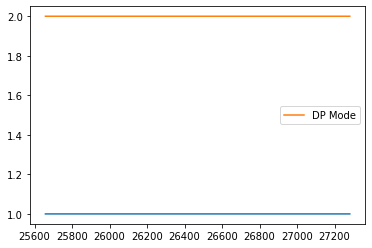

In [176]:
x1 = df.iloc[25658:27282]['secs']
y1 = df.iloc[25658:27282]['numberOfMdoEnginesRunning']
ydp = df.iloc[25658:27282]['dpMode']

plt.plot(x1,y1)
plt.plot(x1,ydp, label = 'DP Mode')
plt.legend()

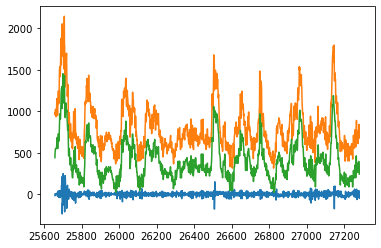

In [198]:
x1 = df.iloc[25658:27282]['secs']
y2 = df.iloc[25658:27282]['battery_0__actualPower']
y3 = df.iloc[25658:27282]['sumEngMdoPower']
y4 = df.iloc[25658:27282]['thrusterAndPropulsion']

plt.plot(x1,y2)
plt.plot(x1,y3)
plt.plot(x1,y4)

This looks like spinning reserve. The vessel is in DP mode 2 - maneuvering and only one generator is running. The battery then serves as spinning reserve

Text(0.5, 1.0, 'Speed Over Ground')

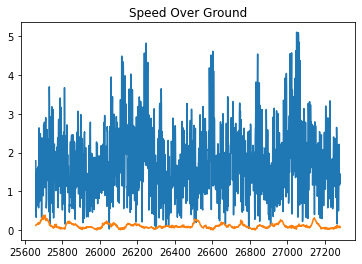

In [179]:
y = df.iloc[25658:27282]['speedOverGround']


plt.plot(x1,y)
plt.plot(x1, yload[25658:27282])
plt.title('Speed Over Ground')

# Second time 1 engine running

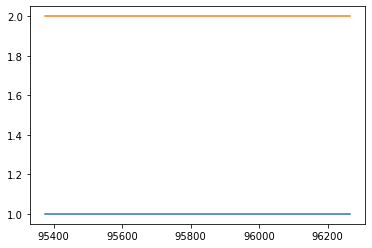

In [80]:
x1 = df.iloc[95376:96266]['secs']
y1 = df.iloc[95376:96266]['numberOfMdoEnginesRunning']
y2 = df.iloc[95376:96266]['dpMode']

plt.plot(x1,y1)
plt.plot(x1,y2)

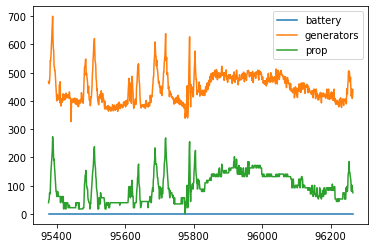

In [180]:
x1 = df.iloc[95376:96266]['secs']
y1 = df.iloc[95376:96266]['battery_0__actualPower']
y2 = df.iloc[95376:96266]['sumEngMdoPower']
y3 = df.iloc[95376:96266]['thrusterAndPropulsion']

plt.plot(x1,y1, label = 'battery')
plt.plot(x1,y2, label = 'generators')
plt.plot(x1,y3, label = 'prop')
plt.legend()


Here its the same as the first instance, only shorter time. DP maneuvering and a single generator running. 

Text(0.5, 1.0, 'SpeedOverGround')

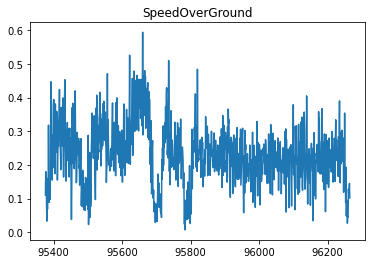

In [182]:
y = df.iloc[95376:96266]['speedOverGround']

plt.plot(x1,y)
plt.title('SpeedOverGround')

# third time 1 generator running

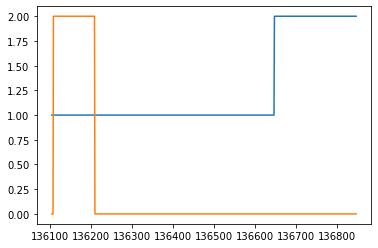

In [189]:
x1 = df.iloc[136105:136847]['secs']
y1 = df.iloc[136105:136847]['numberOfMdoEnginesRunning']
y2 = df.iloc[136105:136847]['dpMode']

plt.plot(x1,y1)
plt.plot(x1,y2)

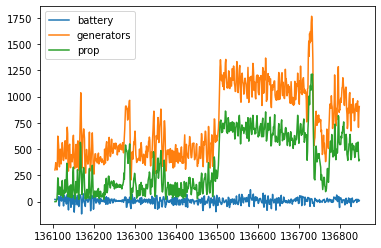

In [190]:
x1 = df.iloc[136105:136847]['secs']
y1 = df.iloc[136105:136847]['battery_0__actualPower']
y2 = df.iloc[136105:136847]['sumEngMdoPower']
y3 = df.iloc[136105:136847]['thrusterAndPropulsion']

plt.plot(x1,y1, label = 'battery')
plt.plot(x1,y2, label = 'generators')
plt.plot(x1,y3, label = 'prop')
plt.legend()


Text(0.5, 1.0, 'SOG')

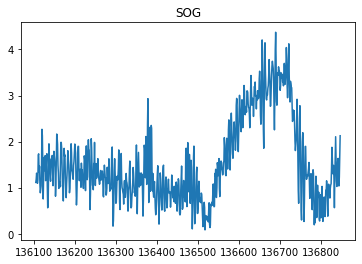

In [191]:
x1 = df.iloc[136105:136847]['secs']
y = df.iloc[136105:136847]['speedOverGround']

plt.plot(x1,y)
plt.title('SOG')

SOG is plottet for an extra 100 seconds to see what happens. It is clear that this is spinning reserve from the battery. At the end of the interval the vessel SOG increases and the load increases

# first long period with 2 generators running

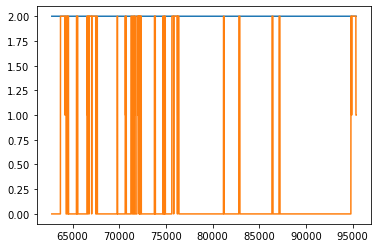

In [136]:
x1 = df.iloc[62775:95376]['secs']
y1 = df.iloc[62775:95376]['numberOfMdoEnginesRunning']
y2 = df.iloc[62775:95376]['dpMode']

plt.plot(x1,y1)
plt.plot(x1,y2)

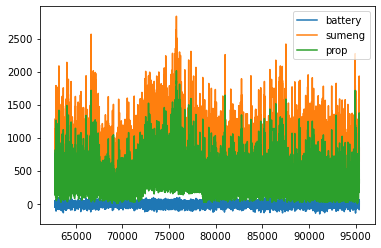

In [200]:
x1 = df.iloc[62775:95376]['secs']
y1 = df.iloc[62775:95376]['battery_0__actualPower']
y3 = df.iloc[62775:95376]['thrusterAndPropulsion']
y4 = df.iloc[62775:95376]['engMdoPower_3_']
y2 = df.iloc[62775:95376]['engMdoPower_1_']
y6 = df.iloc[62775:95376]['sumEngMdoPower']

plt.plot(x1,y1, label = 'battery')
plt.plot(x1,y6, label = 'sumeng')
plt.plot(x1,y3, label = 'prop')
#plt.plot(x1,y2, label = 'gen1')
#plt.plot(x1,y4, label = 'gen3')

plt.legend()

# second long interval with 2 generators

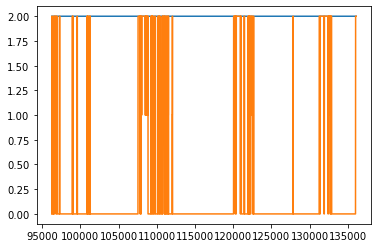

In [155]:
x1 = df.iloc[96266:136105]['secs']
y1 = df.iloc[96266:136105]['numberOfMdoEnginesRunning']
y2 = df.iloc[96266:136105]['dpMode']

plt.plot(x1,y1)
plt.plot(x1,y2)

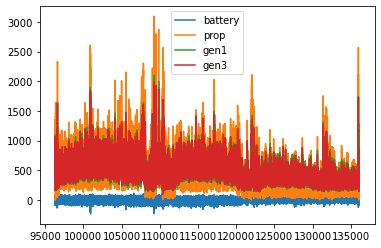

In [156]:
x1 = df.iloc[96266:136105]['secs']
y1 = df.iloc[96266:136105]['battery_0__actualPower']
y3 = df.iloc[96266:136105]['thrusterAndPropulsion']
y4 = df.iloc[96266:136105]['engMdoPower_3_']
y2 = df.iloc[96266:136105]['engMdoPower_1_']

plt.plot(x1,y1, label = 'battery')
plt.plot(x1,y3, label = 'prop')
plt.plot(x1,y2, label = 'gen1')
plt.plot(x1,y4, label = 'gen3')
plt.legend()

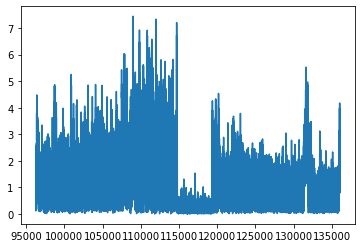

In [157]:
y = df.iloc[96266:136105]['speedOverGround']

plt.plot(x1,y)

The interval with low speeds is in dpmode 0